In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def read_edge(net_name):
    path = '/home/hermuba/data0118/network1122/'
    filename = path + net_name + '_lls_rm_plasmid_edgelist'
    
    # skip first line header!!
    with open(filename, 'rb') as f:
      
        net = nx.read_edgelist(f, nodetype = str, comments = '#')
    return(net)



In [2]:
string = read_edge('string')
refseq = read_edge('refseq')
eskape = read_edge('eskape')
domain = read_edge('domain')

In [3]:
combined = nx.compose(refseq, eskape)
combined = nx.compose(combined, string)
combined = nx.compose(combined, domain)

In [4]:
import numpy as np
def bayesian_integration(attr_dict, D = 1):
    ''' Bayesian Integration to integrate many networks
    D is a constant, please see the original paper'''
    sorted_lls = -np.sort(-np.array(list(attr_dict.values())))  #descending
    ans = 0
    for sorted_index in range(len(sorted_lls)):
        ans += sorted_lls[sorted_index]/((sorted_index+1)*D)
    return(ans)
    

In [5]:
test_dict = {'one':9, 'two': 2, 'three': 25}
test_ans = 25/1 + 9/2 + 2/3
bayesian_integration(test_dict, D = 1)

30.166666666666668

In [6]:
test_ans

30.166666666666668

In [8]:
output_file = '/home/hermuba/data0118/network1122/combined_rm_plasmid_baye'
# write header
with open(output_file, 'w') as f:
    f.write('#gene_one,gene_two,combined_lls\n')
    
for e in combined.edges(data = True):
    with open(output_file, 'a') as f:
            
        f.write(e[0]+','+e[1]+','+str(bayesian_integration(e[2]))+'\n')
        

In [10]:
e[2]

{'domain_lls': 2.6044016057450023}

In [ ]:
gold_anno = pd.read_pickle('/home/hermuba/data0118/goldstandard/ec_rmplasmid_node_anno_df')
unanno = set(combined.nodes)-set(gold_anno.index) # 319 genes not in gold_anno
result = pd.DataFrame(0, columns = ['core-core', 'core-acc', 'acc-acc'], index = ['domain_lls', 'eskape_lls', 'refseq_lls', 'string_lls'])
for e in combined.edges(data = True):
    node1 = e[0]
    node2 = e[1]
    edge_supported_by = list(e[2].keys())
    
    if node1 not in unanno and node2 not in unanno:
        if  gold_anno.loc[[node1, node2], 'core'].sum() == 2:
            #'edge between core genes'
            result.loc[edge_supported_by, 'core-core'] += 1
        if  gold_anno.loc[[node1, node2], 'core'].sum() == 1:
            #'edge between core acc genes'
            result.loc[edge_supported_by, 'core-acc'] += 1
        if  gold_anno.loc[[node1, node2], 'core'].sum() == 0:
            #'edge between acc genes'
            result.loc[edge_supported_by, 'acc-acc'] += 1

In [40]:

# unique edge
unique_result = pd.DataFrame(0, columns = ['core-core', 'core-acc', 'acc-acc'], index = ['domain_lls', 'eskape_lls', 'refseq_lls', 'string_lls'])
for e in combined.edges(data = True):
    node1 = e[0]
    node2 = e[1]
    edge_supported_by = list(e[2].keys())
    
    if node1 not in unanno and node2 not in unanno and len(edge_supported_by)==1:
        if  gold_anno.loc[[node1, node2], 'core'].sum() == 2:
            #'edge between core genes'
            unique_result.loc[edge_supported_by, 'core-core'] += 1
        if  gold_anno.loc[[node1, node2], 'core'].sum() == 1:
            #'edge between core acc genes'
            unique_result.loc[edge_supported_by, 'core-acc'] += 1
        if  gold_anno.loc[[node1, node2], 'core'].sum() == 0:
            #'edge between acc genes'
            unique_result.loc[edge_supported_by, 'acc-acc'] += 1

In [14]:
gold_anno = pd.read_pickle('/home/hermuba/data0118/goldstandard/ec_rmplasmid_node_anno_df')
gold_anno.loc[e[0], 'core']

False

In [15]:
True + True

2

In [36]:
result

,core-core,core-acc,acc-acc
domain_lls,324376,539009,1207566
eskape_lls,171065,103029,31850
refseq_lls,125933,137472,120401
string_lls,4444,269,216


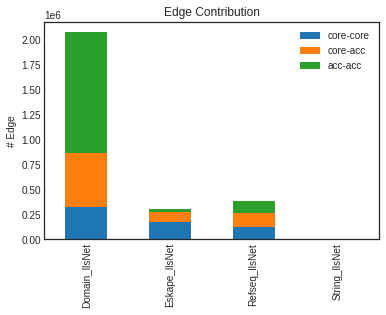

In [42]:
import matplotlib as mpl
mpl.style.use('seaborn-white')
result.plot(kind = 'bar', stacked = True)
result.index = [i.capitalize()+'Net' for i in result.index]
plt.ylabel('# Edge')
plt.title('Edge Contribution')
plt.savefig('/home/hermuba/data0118/fig/edge_comp.svg', format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')

In [45]:
unique_result

,core-core,core-acc,acc-acc
domain_lls,314910,535710,1194740
eskape_lls,160872,97527,25838
refseq_lls,120436,132619,108981
string_lls,2158,242,166


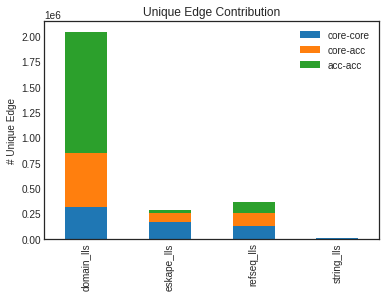

In [44]:
import matplotlib as mpl
mpl.style.use('seaborn-white')
unique_result.plot(kind = 'bar', stacked = True)
#unique_result.index = [i.capitalize()+'Net' for i in unqiue_result.index]
plt.ylabel('# Unique Edge')
plt.title('Unique Edge Contribution')
plt.savefig('/home/hermuba/data0118/fig/unique_edge_comp.svg', format = 'svg', dpi = 300, pad_inches = 1, bbox_inches='tight')

In [32]:
gold_anno.shape

(31621, 20)